# Data Exploratory Data Analysis
### Date: Oct 3, 2020
### Ali Eddeb
#### Goal: Explore freelancer project data to find trends in the job demand and competition.


In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
%matplotlib inline

In [2]:
#import custom module
cwd = os.getcwd()
scripts_dir = os.path.join(cwd, 'scripts')
sys.path.insert(1, scripts_dir)
import clean as cl

In [3]:
#load in data with cleaning steps
df = cl.clean_df(pd.read_csv('data/2020-09-06_data.csv'))
df.head()

,job_title,description,url,tags,price,avg_bid,bids,days_remaining,verified_payment,promotions,contest,price_min,price_max
0,I need 20 Typewritters for typing 2190 page in...,I need you to write some articles.,/projects/articles/need-typewritters-for-typin...,"['Article Rewriting', 'Article Writing', 'Ghos...",NaN,0,0,6,0,[],0,15.0,25.0
1,College Application Essay,Hello. I'm looking for someone who can write m...,/projects/research-writing/college-application...,"['Academic Writing', 'Creative Writing', 'Essa...",10.0,1,2,6,0,[],0,NaN,NaN
2,Write a Training Website Content ( Read- Give...,"Hi,I am looking for someone to write a trainin...",/projects/content-writing/write-training-websi...,"['Article Rewriting', 'Article Writing', 'Cont...",NaN,0,0,6,1,[],0,10.0,30.0
3,Develop Excel Dashboard,Looking for professional to Develop Excel Dash...,/projects/excel/develop-excel-dashboard/,"['Excel', 'Excel VBA', 'Microsoft Office']",56.0,1,4,6,1,[],0,NaN,NaN
4,Looking for a Front End Web Developer,Hello Folks!We are looking for a freelance fro...,/projects/html/looking-for-front-end-web-27255...,"['Bootstrap', 'CSS', 'HTML', 'PHP', 'Website D...",NaN,0,0,6,0,[],0,20.0,171.0


In [4]:
#how many rows and columns
df.shape

(18163, 13)

In [5]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 18163 entries, 0 to 18705
Data columns (total 13 columns):
job_title           18163 non-null object
description         18163 non-null object
url                 18163 non-null object
tags                18163 non-null object
price               16278 non-null float64
avg_bid             18163 non-null int32
bids                18163 non-null int32
days_remaining      18163 non-null int32
verified_payment    18163 non-null int32
promotions          18163 non-null object
contest             18163 non-null int32
price_min           1885 non-null float64
price_max           1885 non-null float64
dtypes: float64(3), int32(5), object(5)
memory usage: 1.6+ MB


In [6]:
#summary statistics (excludes NaNs) of numeric columns
df.describe()

,price,avg_bid,bids,days_remaining,verified_payment,contest,price_min,price_max
count,1.627800e+04,18163.000000,18163.000000,18163.000000,18163.000000,18163.000000,1885.000000,1885.000000
mean,5.756782e+03,0.896218,33.797831,3.802180,0.406155,0.061554,86.514589,249.719894
std,6.445304e+05,0.304986,79.090309,39.947394,0.491128,0.240350,297.851281,2854.261021
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.100000e+01,1.000000,8.000000,2.000000,0.000000,0.000000,13.000000,26.000000
50%,9.900000e+01,1.000000,18.000000,3.000000,0.000000,0.000000,29.000000,67.000000
75%,3.390000e+02,1.000000,38.000000,5.000000,1.000000,0.000000,75.000000,168.000000
max,8.220168e+07,1.000000,3144.000000,4415.000000,1.000000,1.000000,10000.000000,100000.000000


The numeric columns shown above can give us an idea of how much competition there is for a project by looking at the number of bids and the pay range. Before we dive deeper, let's visualize these columns.

Note:
- avg_bid, verified_payment and contest are booleans represented by integers

## Plots

In [7]:
#adjusting plot settings
plt.rcParams["figure.figsize"] = (12,6)
sns.set_style("darkgrid")

### Price Plots

Notes:
- there are 3 columns related to project prices
    - price represents the average of bids on a project
    - price_min represents the lower price range for a project
    - price_max represents the higher price range for a project

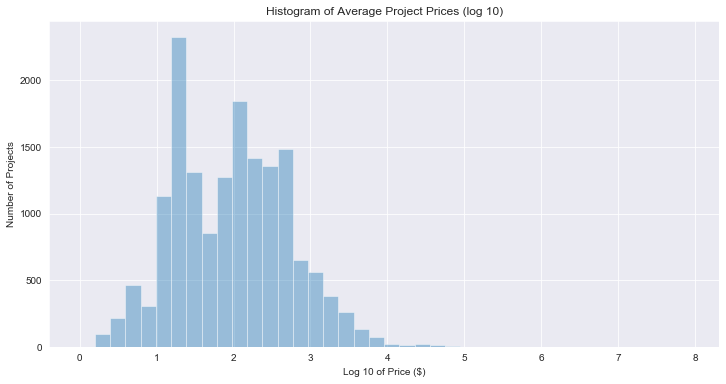

In [8]:
#let's look at pay (need to use log10 due to exponetial difference in range)
sns.distplot(np.log10(df.price), kde=False, bins=40, color='tab:blue')
plt.xlabel('Log 10 of Price ($)')
plt.ylabel('Number of Projects')
plt.title('Histogram of Average Project Prices (log 10)')
plt.show()

- Bimodal (two most popular price ranges for projects):
    - Peak at around 1.2 to 1.4 corresponding to \$15-\$25
    - Another peak at 2 to 2.2 corresponding to \$100-\$160
- Very few projects priced under \$10 or above \$1000


In [9]:
#when using log on price_min, it results in some negative infinity values...Infinity cannot be binned for a histogram so these values will be changed to NaNs
price_min = df['price_min'].copy()
price_min[price_min == 0] = np.NaN

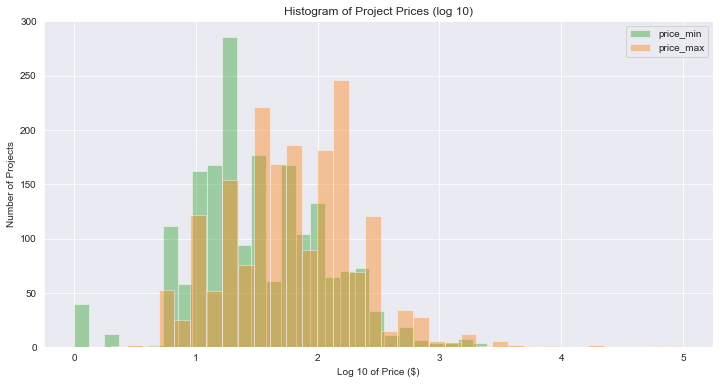

In [10]:
#note using price_min containing no zeroes instead of the original column (df.price_min)
#need to drop NaNs using dropna because NaNs were causing problems
sns.distplot(np.log10(price_min.dropna()), kde=False, label='price_min', color='tab:green')
sns.distplot(np.log10(df.price_max.dropna()), kde=False, label='price_max', color='tab:orange')
plt.xlabel('Log 10 of Price ($)')
plt.ylabel('Number of Projects')
plt.title('Histogram of Project Prices (log 10)')
plt.legend()
plt.show()

Observations:
- As expected, price min skews to the lower prices where as price max for projects skews to higher prices
- A good portion of projects are in the $100+ range for min and max prices --> worth exploring which projects have these higher prices

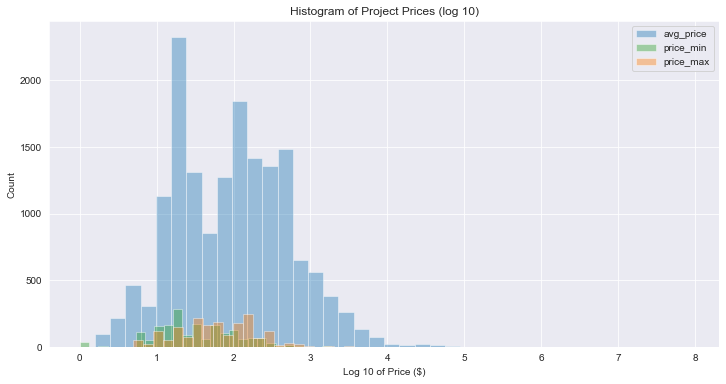

In [11]:
#here is price min and max in relation to projects with just an average price (ie. has a bid)
sns.distplot(np.log10(df.price), kde=False, bins=40, label = 'avg_price', color='tab:blue')
sns.distplot(np.log10(price_min.dropna()), kde=False, label='price_min', color='tab:green')
sns.distplot(np.log10(df.price_max.dropna()), kde=False, label='price_max', color='tab:orange')
plt.xlabel('Log 10 of Price ($)')
plt.ylabel('Count')
plt.title('Histogram of Project Prices (log 10)')
plt.legend()
plt.show()

We can see most projects have an average price, indicating that these projects have bids where as a small portion of projects have a price range (ie. price_min and price_max) indicating no bids have bin placed. We can verify this as follows:

In [12]:
#if a project has no bids, then it will have no average price, just a price range
#we can check this by seeing presence of missing values. If no bids, then we expect ALL price values to be NaNs (ie. True)
df['price'][df['bids']==0].isna().all()


True

In [13]:
#...and no missing values for the price range columns
df[['price_min','price_max']][df['bids']==0].isna().any()


price_min    False
price_max    False
dtype: bool

Good. Checks out. Let's check the converse (ie. for projects with bids)

In [14]:
#if a project has at least 1 bid, then the project would have an average price (representing the average bid price) and no price range
df[['price','price_min','price_max']][df['bids'] > 0].isna().sum() / len(df[df['bids'] > 0])



price        0.094711
price_min    0.905289
price_max    0.905289
dtype: float64

A little off the mark! There are some projects that have bids with a price range and no average price (about 9%). After re-visiting the site, it seems some project owners prefer to keep a price range as opposed to showing the average bid price on their projects. 

### Boolean Columns

Let's also take a look at the columns containing booleans:
- avg_bid: does the project have an average bid price (as opposed to a price range)?
- verified_payment: is the project setup with a verified payment?
- contest: is the project a contest?

In [15]:
#note: if a project has an average bid, that means it has an average price, represented by the price column, and no price range. Let's confirm:
df[['price','price_min', 'price_max']][df['avg_bid'] == 1].isna().sum() / len(df[df['avg_bid'] == 1])

price        0.0
price_min    1.0
price_max    1.0
dtype: float64

As we can see, there are no NaNs for price but all NaNs for the price range columns which confirms the above.

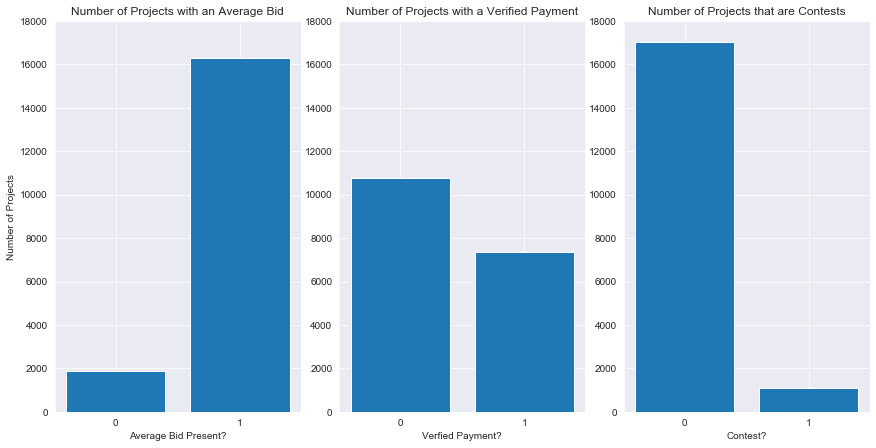

In [16]:
#now let's plot the 3 boolean columns as bar graphs

plt.subplots(1,3)
plt.tight_layout()

plt.subplot(1,3,1)
plt.bar(df.avg_bid.value_counts().index, df.avg_bid.value_counts().values)
plt.xticks([0,1])
plt.ylim(0,18000)
plt.ylabel('Number of Projects')
plt.xlabel('Average Bid Present?')
plt.title('Number of Projects with an Average Bid')

plt.subplot(1,3,2)
plt.bar(df.verified_payment.value_counts().index, df.verified_payment.value_counts().values)
plt.xticks([0,1])
plt.ylim(0,18000)
plt.xlabel('Verfied Payment?')
plt.title('Number of Projects with a Verified Payment')

plt.subplot(1,3,3)
plt.bar(df.contest.value_counts().index, df.contest.value_counts().values)
plt.xticks([0,1])
plt.ylim(0,18000)
plt.xlabel('Contest?')
plt.title('Number of Projects that are Contests')

plt.show()


Observations:
- most projects have an average bid as opposed to a price range
- there's about a 65/35 split between projects having a verified payment in place
- most projects are NOT contests

The last numeric column that can be explored is the **days_remaining** column which represents the remaining active days for the project in which a bid can be placed.

#### Days Remaining Histogram

In [17]:
#before plotting, let's see the range of values
np.quantile(df.days_remaining, np.arange(0,1.05, 0.05))

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
       2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 4.000e+00,
       4.000e+00, 4.000e+00, 4.400e+00, 5.000e+00, 5.000e+00, 6.000e+00,
       6.000e+00, 6.000e+00, 4.415e+03])

We can see up to the 95% percentile, the days remaining is at 6 and then jumps to 4400. Let's see how many values are above 100.

In [18]:
len(df[df['days_remaining'] >= 100])

5

Only 5 projects have days_remaining above 100. Surely these are outliers. Let's graph just the projects with days_remaining below 100 days.

In [19]:
below_100 = df['days_remaining'][df['days_remaining'] < 100]

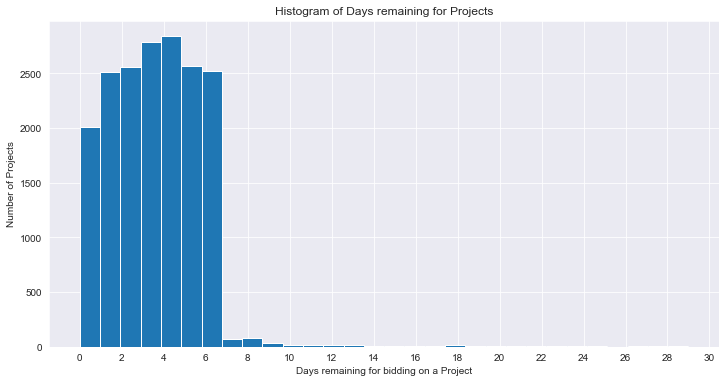

In [20]:
#lets display days remaining as a histogram
plt.hist(below_100, bins=30)
plt.xlabel('Days remaining for bidding on a Project')
plt.ylabel('Number of Projects')
plt.title('Histogram of Days remaining for Projects')
plt.xticks(range(0,31,2))
plt.show()

Observations:
- it seems like most project posters favour keeping bidding active for 1 week as the most occuring values are within 7 days
- very few project posters seem to have the time to wait for more than a week to end bidding
    - this indicates that most posters want to get the right talent in the shortest possible amount of time which seems to be a week

### Non-numeric columns

In the next notebook, I would like to explore the non-numeric columns which contains the project title, description and tags. This will help inform what type of projects are being posted and their demand.